In [2]:
import numpy as np
import matplotlib.pyplot as plt
from filamentlib.VField import VField

## Not closed Version

In [2]:
def updateKappaBinorm(curve: np.array, tspan: list, numOfSteps: int):
    curves = np.zeros( (numOfSteps + 1, curve.shape[0], curve.shape[1]) )
    curves[0,:,:] = curve

    for i in range( 1, numOfSteps + 1 ):
        curves[i,:,:] = curves[i-1,:,:] + (tspan[1] - tspan[0])/numOfSteps*VField.KappaBinormal(curves[i-1,:,:])
    
    return curves

In [3]:
# Make the Pringle function
P = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
PPoints = np.linspace( 0, 2 * np.pi, 200 )

# Find values on the pringle
s = np.array( P(PPoints) )

tspan = [0,100000]
numOfSteps = 10
curves = updateKappaBinorm(s, tspan, numOfSteps)

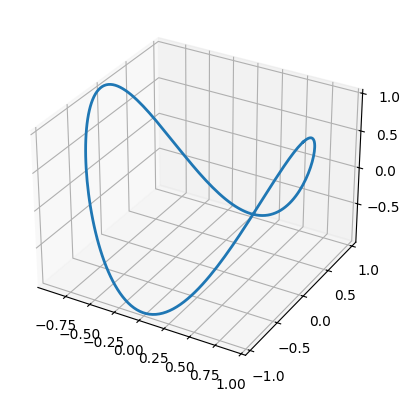

In [4]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Assuming 'curves' is your NumPy array with the shape (1001, 3, 200)
# curves = np.random.rand(1001, 3, 200)  # Example initialization

# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the axes properties (adjust these limits according to your data)
ax.set_xlim([np.min(curves[:, 0, :]), np.max(curves[:, 0, :])])
ax.set_ylim([np.min(curves[:, 1, :]), np.max(curves[:, 1, :])])
ax.set_zlim([np.min(curves[:, 2, :]), np.max(curves[:, 2, :])])
# Initialize an empty line plot
line, = ax.plot([], [], [], lw=2)

# Update function for the animation
def update(frame):
    # Update the data of the line plot
    line.set_data(curves[frame, 0, :], curves[frame, 1, :])
    line.set_3d_properties(curves[frame, 2, :])
    return line

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(curves)), blit=False)

HTML(ani.to_jshtml())

### Testing Enpoints of the derivative of the curve

By reparametrizing the circle to move the endpoint of the circle, we can show that the problem is with the numerical derivative.

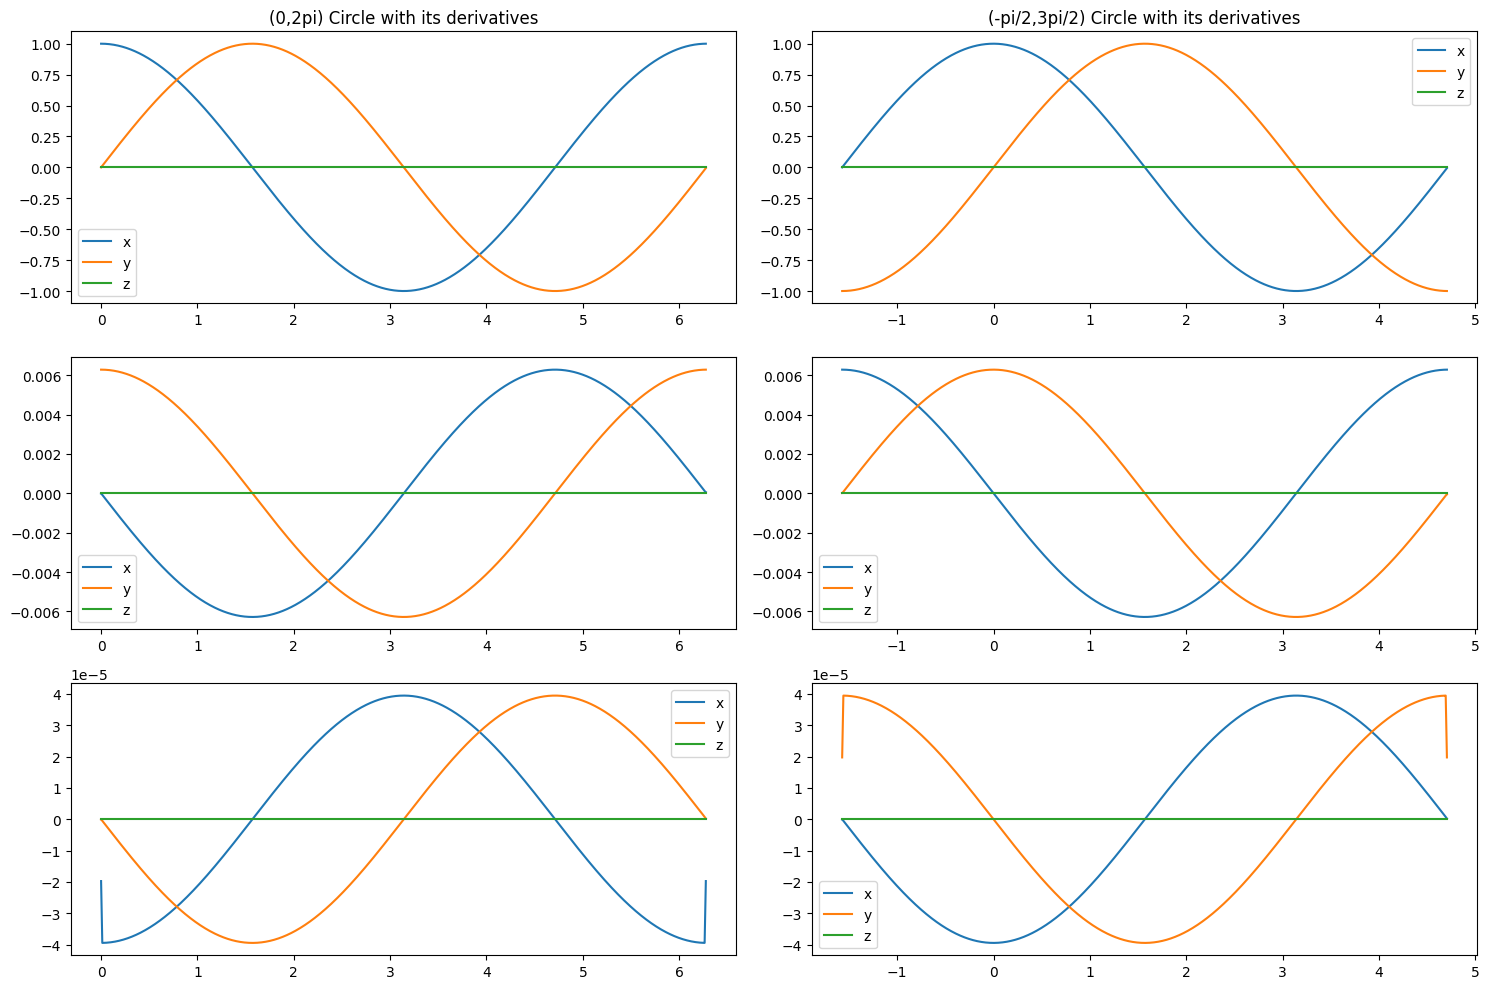

In [5]:
# Define the filament shape
circle = lambda t : [np.cos(t), np.sin(t), t * 0]
circlePoints1 = np.linspace(0,2*np.pi,1000, endpoint=False)
circlePoints2 = np.linspace(-np.pi/2,3*np.pi/2,1000, endpoint=False)

# Generate the circles to test
s1 = np.array(circle(circlePoints1))
s2 = np.array(circle(circlePoints2))

# Calculate the derivatives using np.gradient
ds1 = np.gradient(s1)[1]
ds2 = np.gradient(s2)[1]

# Calculate the second derivatives
dds1 = np.gradient(ds1)[1]
dds2 = np.gradient(ds2)[1]

# Plot the curves with their derivatives
fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 2 columns

axs[0,0].set_title('(0,2pi) Circle with its derivatives')
axs[0,0].plot(circlePoints1, s1[0,:])
axs[0,0].plot(circlePoints1, s1[1,:])
axs[0,0].plot(circlePoints1, s1[2,:])
axs[0,0].legend(['x','y','z'])

axs[0,1].set_title('(-pi/2,3pi/2) Circle with its derivatives')
axs[0,1].plot(circlePoints2, s2[0,:])
axs[0,1].plot(circlePoints2, s2[1,:])
axs[0,1].plot(circlePoints2, s2[2,:])
axs[0,1].legend(['x','y','z'])

axs[1,0].plot(circlePoints1, ds1[0,:])
axs[1,0].plot(circlePoints1, ds1[1,:])
axs[1,0].plot(circlePoints1, ds1[2,:])
axs[1,0].legend(['x','y','z'])

axs[1,1].plot(circlePoints2, ds2[0,:])
axs[1,1].plot(circlePoints2, ds2[1,:])
axs[1,1].plot(circlePoints2, ds2[2,:])
axs[1,1].legend(['x','y','z'])

axs[2,0].plot(circlePoints1, dds1[0,:])
axs[2,0].plot(circlePoints1, dds1[1,:])
axs[2,0].plot(circlePoints1, dds1[2,:])
axs[2,0].legend(['x','y','z'])

axs[2,1].plot(circlePoints2, dds2[0,:])
axs[2,1].plot(circlePoints2, dds2[1,:])
axs[2,1].plot(circlePoints2, dds2[2,:])
axs[2,1].legend(['x','y','z'])

plt.tight_layout()
plt.show()

You can see in the 2nd derivative graph, that there is a jump in points where it ought to look like a smooth sine/cosine curve.

## Closed Version

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from filamentlib.VField import VField

In [7]:
def closedGradient(curve: np.array):
        shiftDist = round(curve.shape[1]/2)

        grad = np.gradient(curve,edge_order=2)[1]
        shiftedCurve = np.roll(curve,shiftDist,axis=1)
        shiftedGrad = np.gradient(shiftedCurve,edge_order=2)[1]

        setBound = round(shiftDist/2)

        grad[:,-setBound-1:-1] = shiftedGrad[:, shiftDist - setBound - 1:shiftDist-1]
        grad[:,0:setBound] = shiftedGrad[:, shiftDist : shiftDist + setBound]

        return grad

In [8]:
def updateKappaBinormClosed(curve: np.array, tspan: list, numOfSteps: int):
    curves = np.zeros( (numOfSteps + 1, curve.shape[0], curve.shape[1]) )
    curves[0,:,:] = curve

    for i in range( 1, numOfSteps + 1 ):
        curves[i,:,:] = curves[i-1,:,:] + (tspan[1] - tspan[0])/numOfSteps*VField.KappaBinormalClosed(curves[i-1,:,:])
    
    return curves

In [9]:
# Make the Pringle function
P = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
PPoints = np.linspace( 0, 2 * np.pi, 200,endpoint=False )

# Find values on the pringle
s = np.array( P(PPoints) )

tspan = [0,100000]
numOfSteps = 10
curves = updateKappaBinormClosed(s, tspan, numOfSteps)

### Testing the Closed Gradient Function

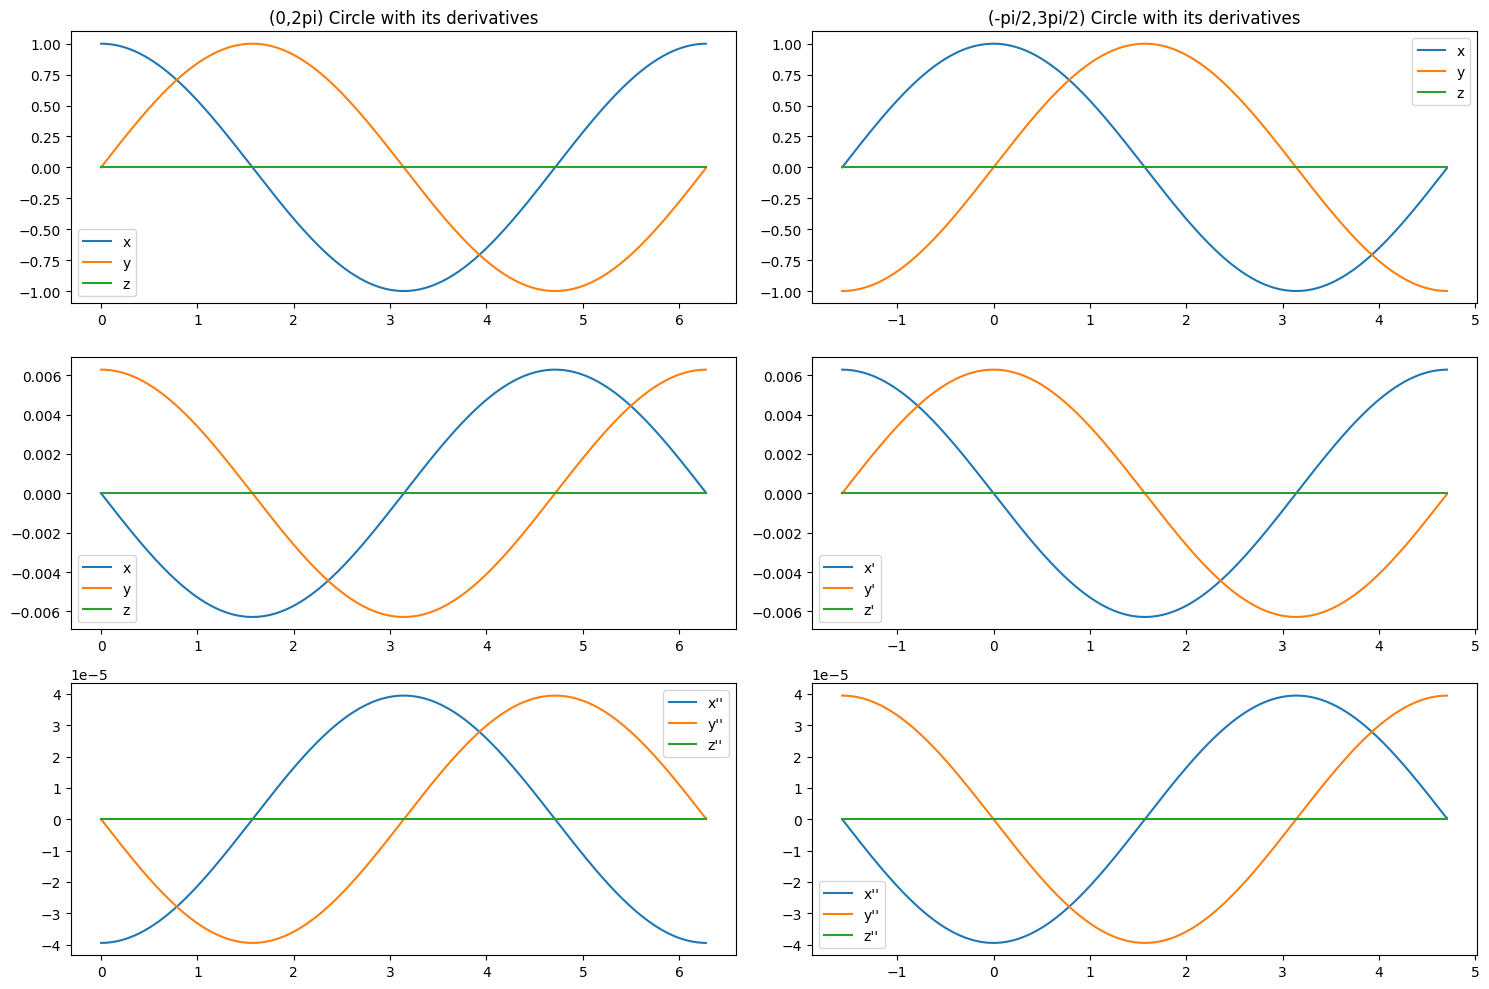

In [10]:
# Define the filament shape
circle = lambda t : [np.cos(t), np.sin(t), t * 0]
circlePoints1 = np.linspace(0,2*np.pi,1000, endpoint=False)
circlePoints2 = np.linspace(-np.pi/2,3*np.pi/2,1000, endpoint=False)

# Generate the circles to test
s1 = np.array(circle(circlePoints1))
s2 = np.array(circle(circlePoints2))

# Calculate the derivatives using np.gradient
ds1 = closedGradient(s1)
ds2 = closedGradient(s2)

# Calculate the second derivatives
dds1 = closedGradient(ds1)
dds2 = closedGradient(ds2)

# Plot the curves with their derivatives
fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 2 columns

axs[0,0].set_title('(0,2pi) Circle with its derivatives')
axs[0,0].plot(circlePoints1, s1[0,:])
axs[0,0].plot(circlePoints1, s1[1,:])
axs[0,0].plot(circlePoints1, s1[2,:])
axs[0,0].legend(['x','y','z'])

axs[0,1].set_title('(-pi/2,3pi/2) Circle with its derivatives')
axs[0,1].plot(circlePoints2, s2[0,:])
axs[0,1].plot(circlePoints2, s2[1,:])
axs[0,1].plot(circlePoints2, s2[2,:])
axs[0,1].legend(['x','y','z'])

axs[1,0].plot(circlePoints1, ds1[0,:])
axs[1,0].plot(circlePoints1, ds1[1,:])
axs[1,0].plot(circlePoints1, ds1[2,:])
axs[1,0].legend(['x','y','z'])

axs[1,1].plot(circlePoints2, ds2[0,:])
axs[1,1].plot(circlePoints2, ds2[1,:])
axs[1,1].plot(circlePoints2, ds2[2,:])
axs[1,1].legend(['x\'','y\'','z\''])

axs[2,0].plot(circlePoints1, dds1[0,:])
axs[2,0].plot(circlePoints1, dds1[1,:])
axs[2,0].plot(circlePoints1, dds1[2,:])
axs[2,0].legend(['x\'\'','y\'\'','z\'\''])

axs[2,1].plot(circlePoints2, dds2[0,:])
axs[2,1].plot(circlePoints2, dds2[1,:])
axs[2,1].plot(circlePoints2, dds2[2,:])
axs[2,1].legend(['x\'\'','y\'\'','z\'\''])

plt.tight_layout()
plt.show()

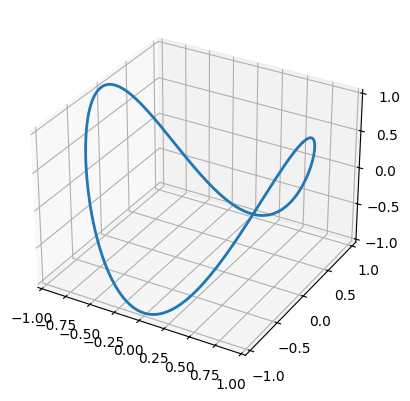

In [11]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Assuming 'curves' is your NumPy array with the shape (1001, 3, 200)
# curves = np.random.rand(1001, 3, 200)  # Example initialization

# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the axes properties (adjust these limits according to your data)
ax.set_xlim([np.min(curves[:, 0, :]), np.max(curves[:, 0, :])])
ax.set_ylim([np.min(curves[:, 1, :]), np.max(curves[:, 1, :])])
ax.set_zlim([np.min(curves[:, 2, :]), np.max(curves[:, 2, :])])
# Initialize an empty line plot
line, = ax.plot([], [], [], lw=2)

# Update function for the animation
def update(frame):
    # Update the data of the line plot
    line.set_data(curves[frame, 0, :], curves[frame, 1, :])
    line.set_3d_properties(curves[frame, 2, :])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(curves)), blit=False)

HTML(ani.to_jshtml())